In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Task 1**

In [25]:
my_column = ['A', 'B']
data = pd.read_csv("data_k_mean.txt", header = None, sep = " ", names = my_column)
data.head()

A        B
0 -7.87157 -4.86573
1 -4.76661 -6.87944
2 -6.67986 -5.83080
3 -8.93021 -4.15571
4 -7.91375 -4.22840

In [26]:
num_rows, num_columns = data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 3000
Number of columns: 2


In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(data['A'], data['B'], c = 'blue', marker = '+', label = 'Data Points')
plt.xlabel('Column A')
plt.ylabel('Column B')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.grid(True)
plt.show()

**Task 2**

In [28]:
np.random.seed(10)

centroids = {
    0: [np.random.uniform(min(data['A']), max(data['A'])), np.random.uniform(min(data['B']), max(data['B']))],
    1: [np.random.uniform(min(data['A']), max(data['A'])), np.random.uniform(min(data['B']), max(data['B']))]
}

In [29]:
def assign_clusters(data, centroids):
    for i in centroids.keys():
        data['distance_from_{}'.format(i)] = (
            np.sqrt((data['A'] - centroids[i][0]) ** 2 + (data['B'] - centroids[i][1]) ** 2)
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    data['closest'] = data.loc[:, centroid_distance_cols].idxmin(axis = 1)
    data['closest'] = data['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    return data

data = assign_clusters(data, centroids)

In [30]:
def update_centroids(centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['closest'] == i]['A'])
        centroids[i][1] = np.mean(data[data['closest'] == i]['B'])
    return centroids

centroids = update_centroids(centroids)

for _ in range(10):
    prev_centroids = dict(centroids)
    data = assign_clusters(data, centroids)
    centroids = update_centroids(centroids)

    if all(
        np.allclose(centroids[i], prev_centroids[i], atol=1e-4)
        for i in centroids.keys()
    ):
        break

**Task 3**

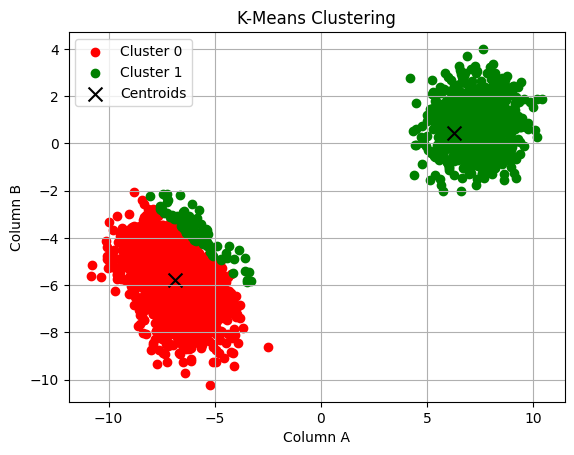

In [31]:
colors = ['r', 'g']
for i in centroids.keys():
    plt.scatter(
        data[data['closest'] == i]['A'],
        data[data['closest'] == i]['B'],
        color = colors[i],
        label = f'Cluster {i}',
    )
plt.scatter(
    [centroids[i][0] for i in centroids.keys()],
    [centroids[i][1] for i in centroids.keys()],
    marker = 'x',
    color = 'black',
    s = 100,
    label = 'Centroids',
)
plt.xlabel('Column A')
plt.ylabel('Column B')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()